## Problem Statement

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, we are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

We will be working with some auto insurance data to create a predictive model that predicts if an insurance claim is fraudulent or not. 

## Importing Dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Import

In [92]:
ds=pd.read_csv('Automobile_insurance_fraud.csv')
df=pd.DataFrame(ds)
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

There are missing values in the dataset as '?'.

## Data Analysis

In [93]:
df.shape

(1000, 40)

There are 40 columns in our dataset with 1000 observations. Out of 40, 1 is target variable 'fraud_reported', which can have values Yes (Y) or No (N)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Column _c39 is blank and no value in any of the observation. So lets drop it first.

In [95]:
df.drop('_c39', axis=1, inplace=True)

In [96]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [97]:
df.describe(include='object')

policy_bind_date policy_state policy_csl insured_sex  \
count              1000         1000       1000        1000   
unique              951            3          3           2   
top          28-04-1992           OH    250/500      FEMALE   
freq                  3          352        351         537   

       insured_education_level insured_occupation insured_hobbies  \
count                     1000               1000            1000   
unique                       7                 14              20   
top                         JD  machine-op-inspct         reading   
freq                       161                 93              64   

       insured_relationship incident_date            incident_type  \
count                  1000          1000                     1000   
unique                    6            60                        4   
top               own-child    02-02-2015  Multi-vehicle Collision   
freq                    183            28                      419   

        collision_type incident_severity authorities_contacted incident_state  \
count             1000              1000                  1000           1000   
unique               4                 4                     5              7   
top     Rear Collision      Minor Damage                Police             NY   
freq               292               354                   292            262   

       incident_city incident_location property_damage  \
count           1000              1000            1000   
unique             7              1000               3   
top      Springfield      4268 2nd Ave               ?   
freq             157                 1             360   

       police_report_available auto_make auto_model fraud_reported  
count                     1000      1000       1000           1000  
unique                       3        14         39              2  
top                         NO      Saab        RAM              N  
freq                       343        80         43            753

- policy_bind_date has 3 unique values. Most of the policies (around 95%) have bind date as 01-01-2006.
- policy state can gave 3 unique values.
- insured_sex can have 2 unique values Male And Female. Around 53% are females.
- There are 7 different education levels for insured. The most common is JD.
- Majority of insured have hobby has reading. There are 19 other hobbies as well.
- Insured relationship has 6 unique values, 'own-child' being the most dominant one.
- Around 41% of the incidents are multi vehli collisions.
- Around 29% of the collisions are rear collisions.
- 35% of the times, it is a minor damage.
- Police is contacted for 29% cases.
- Property damage has 360 missing values as ?
- Police report is not available for 343 cases.
- 75% of the claims reports are not fraud.

In [98]:
df.describe(exclude='object')

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

**Observations:**

- months_as_customer ranges from 0 to 479.
- Age of people ranges from 9 to 64. 50% of people are below age 38.The average age is 38.
- Policy number is just a unique identifier for policy and does not play any role.
- policy_annual_premium is from 433 to 2047.
- incidents hours are from 00:00 hours to 23:00 hours.


## Checking Missing Data

We are having ? in the dataset for missing values. Lets check the count of missing values in each feature.

In [99]:
print("Missing in our dataset: ")
for i in df.columns:
    miss=df[df[i] == '?'][i].count()
    if miss>0:
        print(i, ' : ', miss)

Missing in our dataset: 
collision_type  :  178
property_damage  :  360
police_report_available  :  343


There are missing values in collision_type, property_damage and police_report_available. We will be replacing it with mode.

**collision_type**

In [100]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [102]:
df['collision_type'].replace('?','Rear Collision',inplace=True)

In [103]:
df['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [104]:
df['police_report_available'].replace('?','NO',inplace=True)

In [105]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [106]:
df['property_damage'].replace('?','338',inplace=True)

In [107]:
## Checking the missing count again

print("Missing in our dataset: ")
for i in df.columns:
    miss=df[df[i] == '?'][i].count()
    if miss>0:
        print(i, ' : ', miss)

Missing in our dataset: 


There are no missing values left in our dataset now.

## Plotting of data

**Target Variable data distribution**

In [108]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

Out of 1000, 247 reported cases were fraud.

Text(0, 0.5, 'Number of claims')

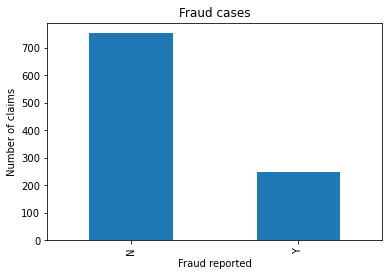

In [113]:
df['fraud_reported'].value_counts().plot.bar()
plt.title('Fraud cases')
plt.xlabel('Fraud reported')
plt.ylabel('Number of claims')

Text(0.5, 1.0, '% of Fraud cases')

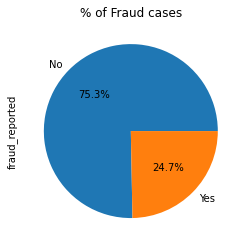

In [115]:
import matplotlib.ticker as mtick
ax = (df['fraud_reported'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'])                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('% of Fraud cases')

The above graph indicates that 75.3% cases were not fraud while 24.5 reported cases were fraud.

**Categorical Varibles data distribution**

In [135]:
cat_col=df.select_dtypes(include='object')
cat_col.drop(['fraud_reported'],axis=1,inplace=True)
cat_col.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')

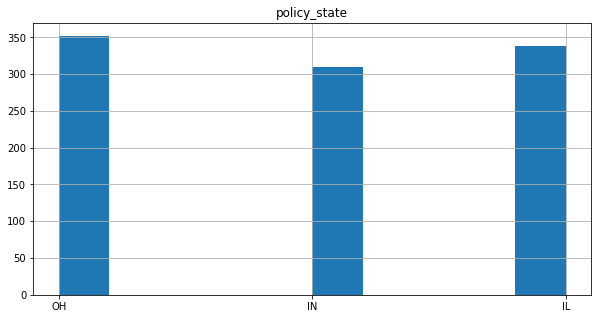

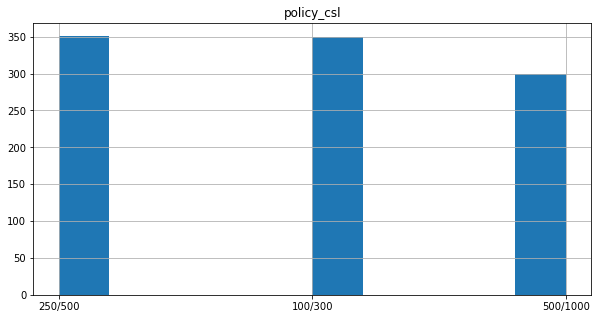

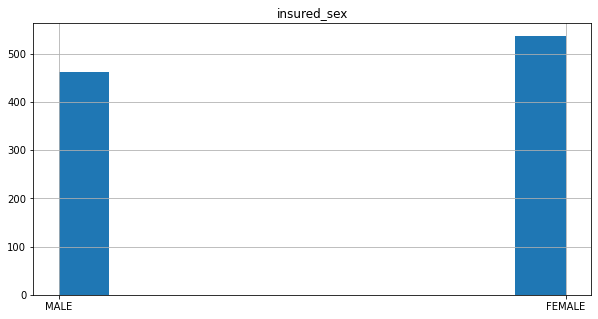

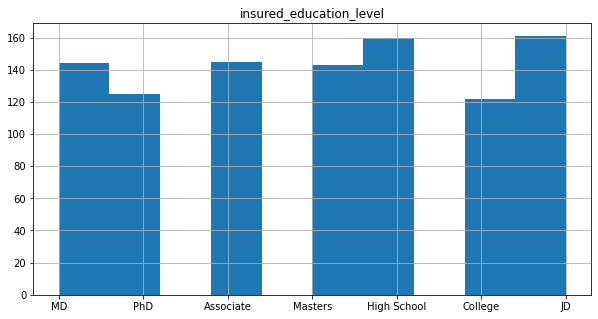

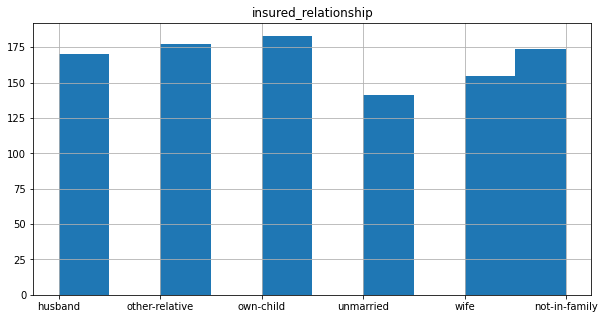

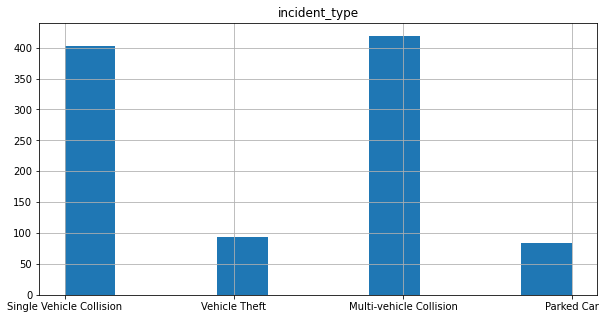

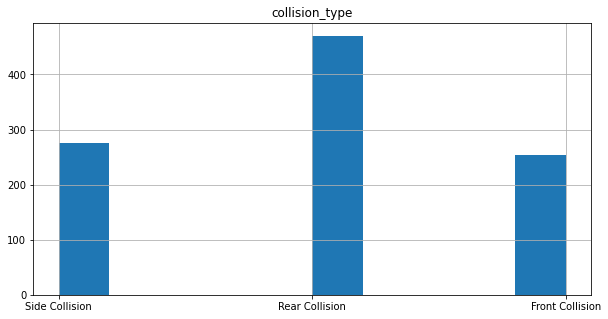

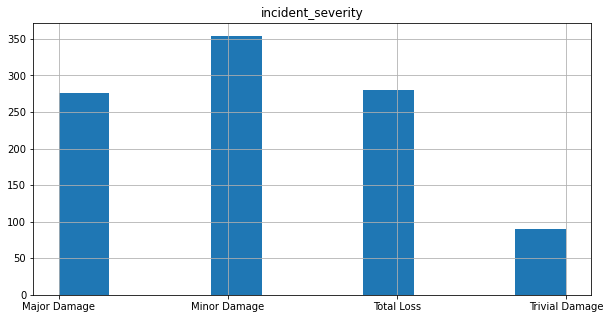

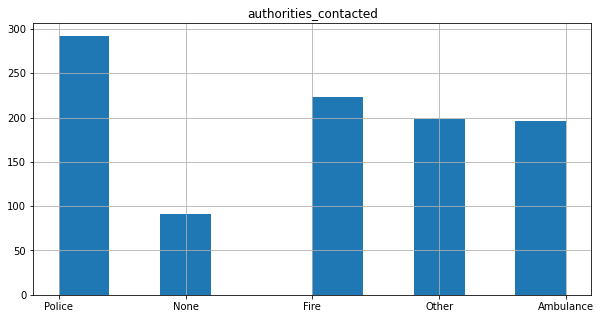

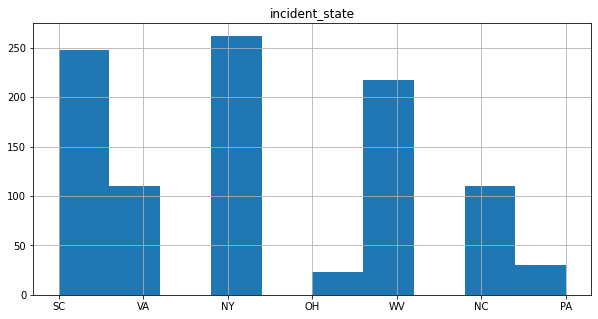

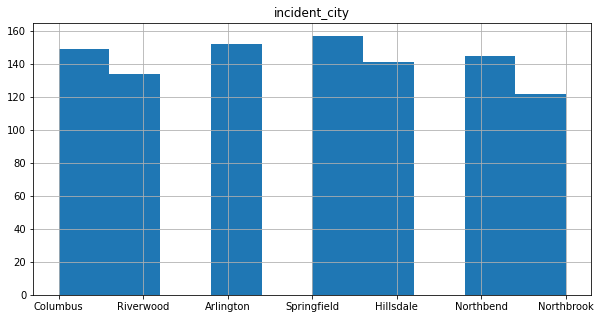

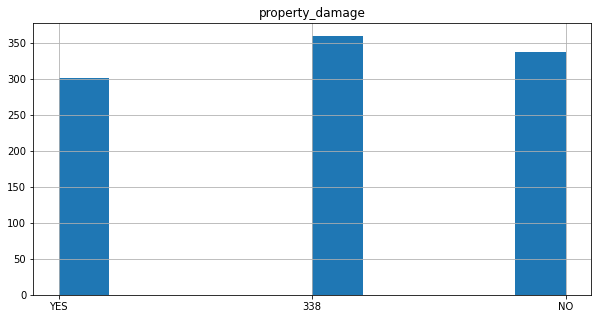

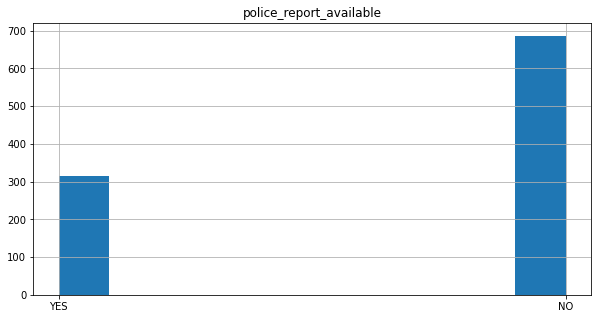

In [125]:
for i in cat_col.columns:
    if df[i].nunique() < 10:
        plt.figure()
        df[i].hist(figsize=(10,5))
        plt.title(i)
        plt.show()

**Observations:**

- policy_state has 3 unique values, 'OH' being the most dominant.
- policy_bind_date has 3 unique values. Most of the policies (around 95%) have bind date as 01-01-2006.
- policy state can gave 3 unique values.
- insured_sex can have 2 unique values Male And Female. Around 53% are females.
- There are 7 different education levels for insured. The most common is JD.
- Majority of insured have hobby has reading. There are 19 other hobbies as well.
- Insured relationship has 6 unique values, 'own-child' being the most dominant one.
- Around 41% of the incidents are multi vehli collisions. The second most common is Single Vehicle Collision.
- Around 29% of the collisions are rear collisions.
- 35% of the times, it is a minor damage.
- Police is contacted for 29% cases. Fire and Ambulance are frequently contacted authorised after police.
- Police report is not available for approax 69% of the cases.
- 75% of the claims reports are not fraud.

<Figure size 432x288 with 0 Axes>

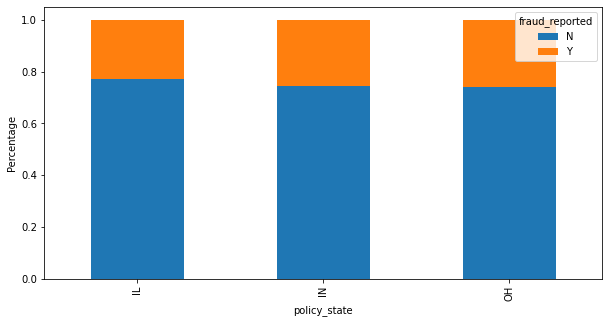

<Figure size 432x288 with 0 Axes>

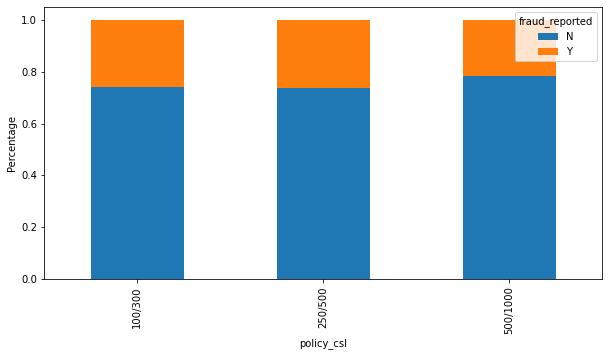

<Figure size 432x288 with 0 Axes>

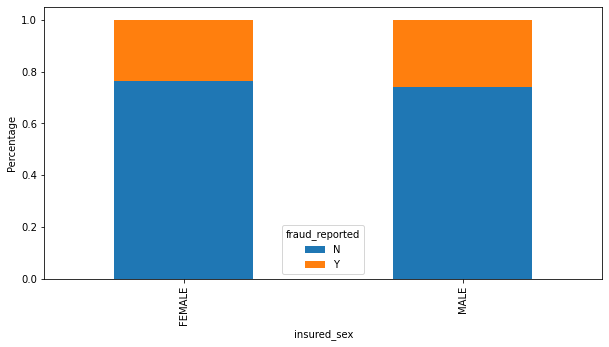

<Figure size 432x288 with 0 Axes>

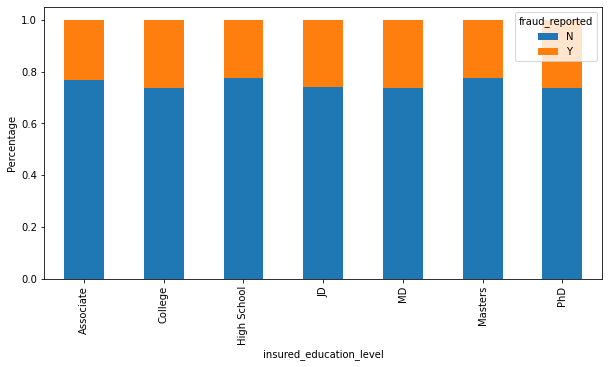

<Figure size 432x288 with 0 Axes>

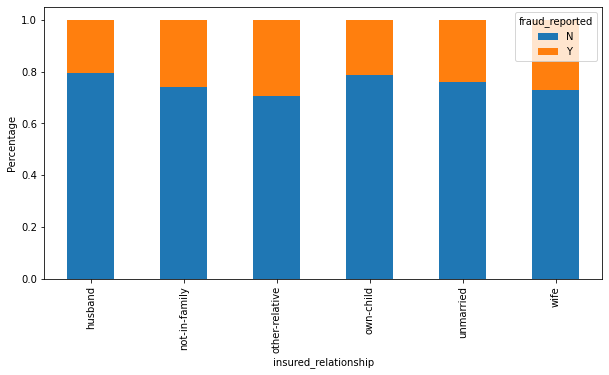

<Figure size 432x288 with 0 Axes>

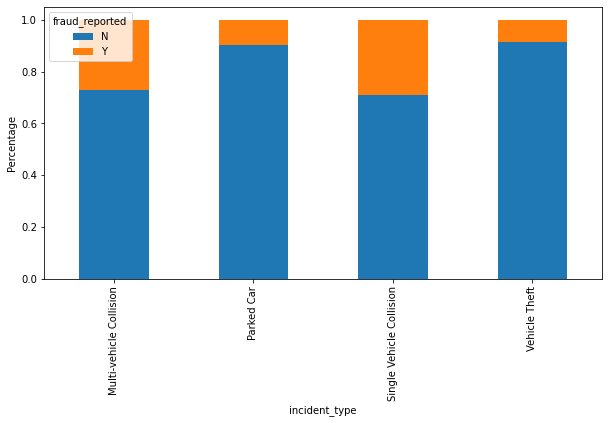

<Figure size 432x288 with 0 Axes>

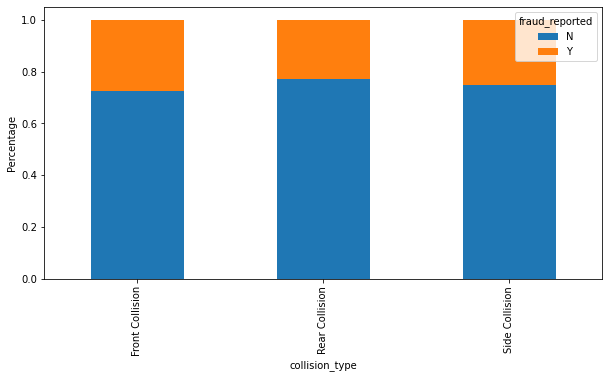

<Figure size 432x288 with 0 Axes>

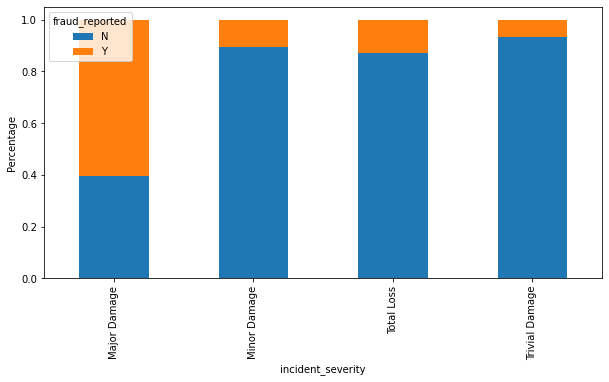

<Figure size 432x288 with 0 Axes>

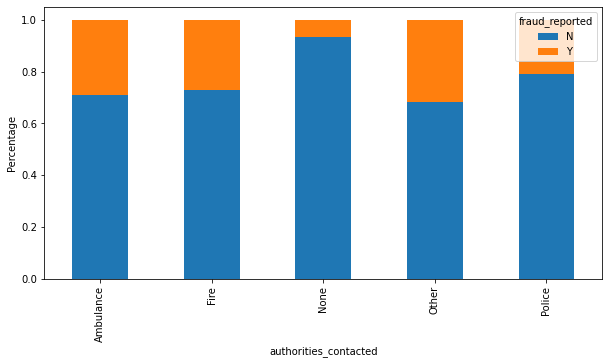

<Figure size 432x288 with 0 Axes>

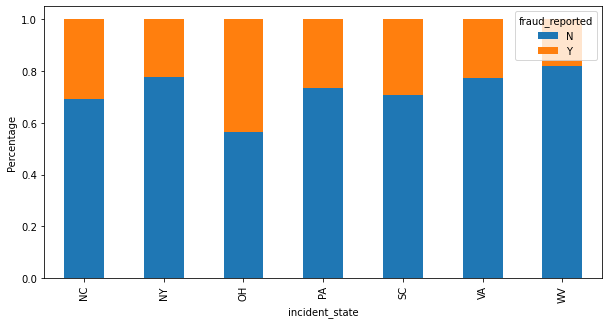

<Figure size 432x288 with 0 Axes>

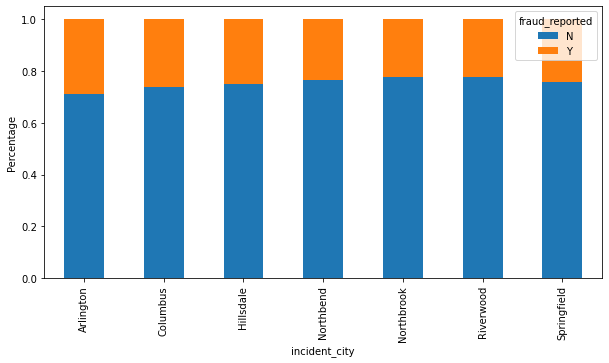

<Figure size 432x288 with 0 Axes>

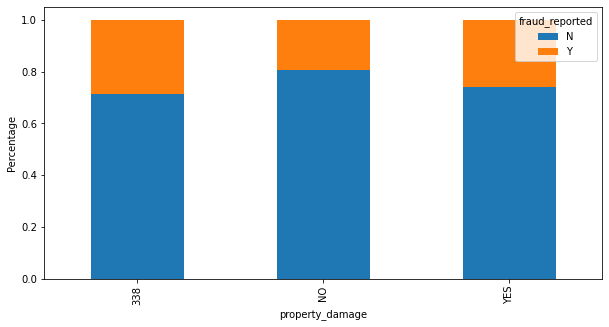

<Figure size 432x288 with 0 Axes>

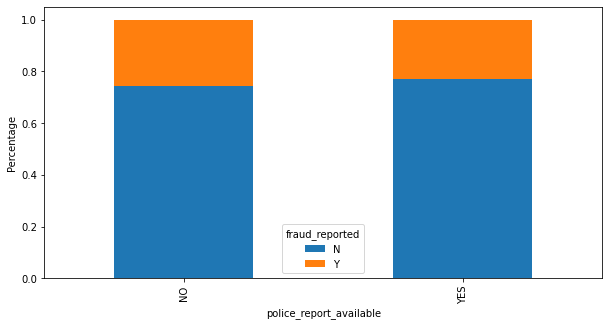

In [129]:
for i in cat_col.columns:
    if df[i].nunique() < 10:
        col=pd.crosstab(df[i],df['fraud_reported'])
        plt.figure()
        col.div(col.sum(1).astype(int),axis=0).plot(kind='bar',stacked=True,figsize=(10,5))
        plt.xlabel(i)
        p = plt.ylabel('Percentage')

**Observations:**

- policy_state, policy_csl, policy_deductable, insured_sex has comparables counts for fraud cases.
- insured_education_level 'College' and 'PhD' has more fraud cases.
- 'other_relative' has more count of fraud cases.
- There are more number of fraud cases reported among Multi-vehicle collisions.
- collision_type has comparable no of fraud cases.
- Among different incident_severity values, Major Damage cases has maximum contribution towards fraud cases count.
- There are maximum no of fraud cases reported in state 'OH', followed by 'NC' and 'SC'.
- Fraud causes count are comparable among all cities.
- Majority of fraud cases reported involved 4 vehicles.


**Numeric Variables Distribution**

In [136]:
num_col=df.select_dtypes(exclude='object')
num_col.head()

months_as_customer  age  policy_number  policy_deductable  \
0                 328   48         521585               1000   
1                 228   42         342868               2000   
2                 134   29         687698               2000   
3                 256   41         227811               2000   
4                 228   44         367455               1000   

   policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0                1406.91               0       466132          53300   
1                1197.22         5000000       468176              0   
2                1413.14         5000000       430632          35100   
3                1415.74         6000000       608117          48900   
4                1583.91         6000000       610706          66000   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         5                            1   
1             0                         8                            1   
2             0                         7                            3   
3        -62400                         5                            1   
4        -46000                        20                            1   

   bodily_injuries  witnesses  total_claim_amount  injury_claim  \
0                1          2               71610          6510   
1                0          0                5070           780   
2                2          3               34650          7700   
3                1          2               63400          6340   
4                0          1                6500          1300   

   property_claim  vehicle_claim  auto_year  
0           13020          52080       2004  
1             780           3510       2007  
2            3850          23100       2007  
3            6340          50720       2014  
4             650           4550       2009

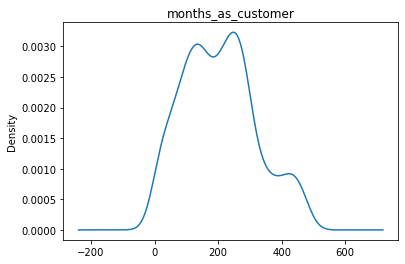

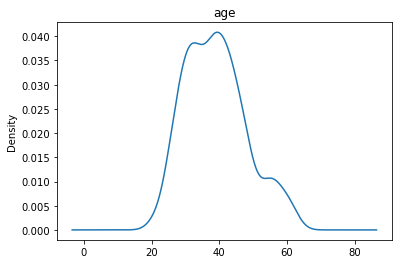

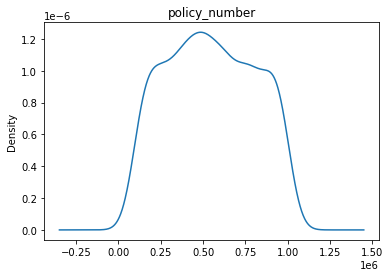

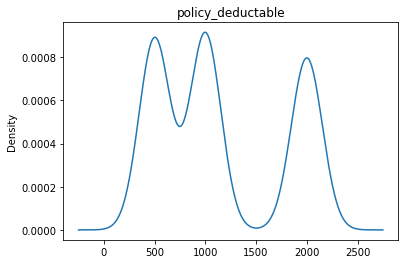

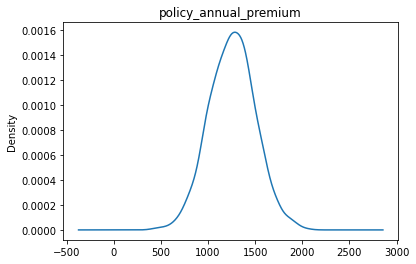

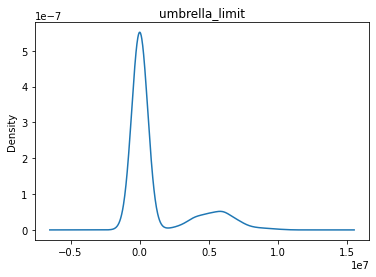

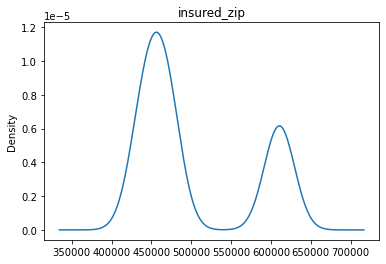

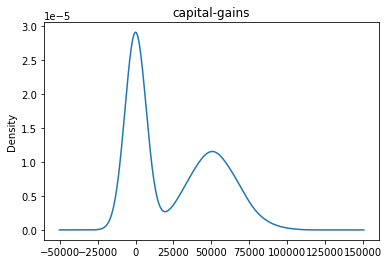

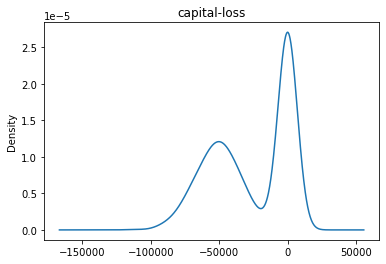

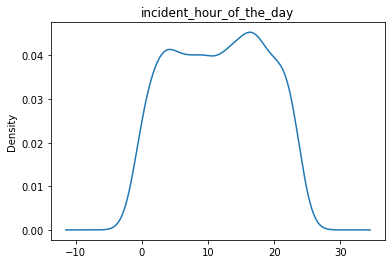

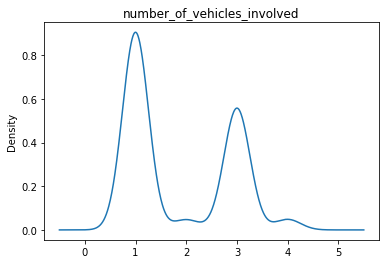

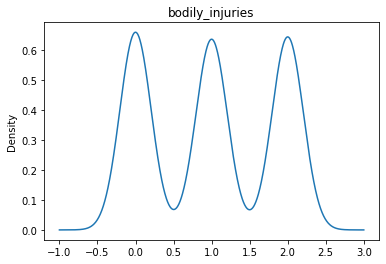

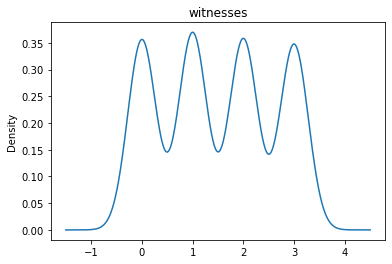

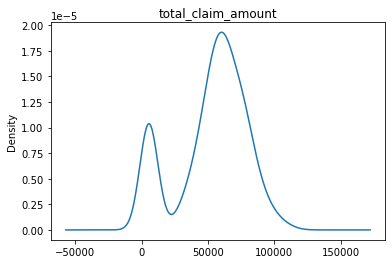

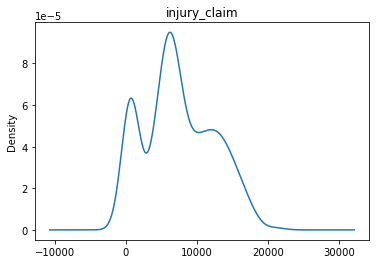

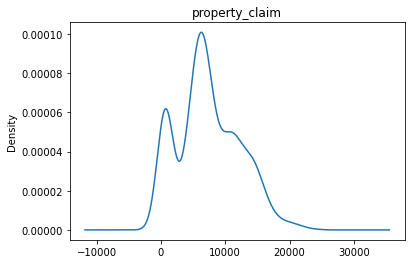

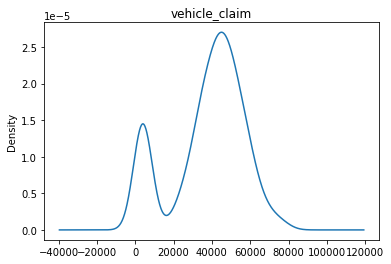

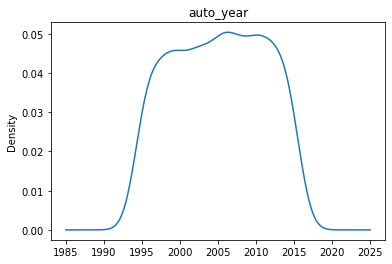

In [137]:
for i in num_col.columns:    
    plt.figure()
    df[i].plot(kind='density')
    plt.title(i)

**Observations:**

- months_as_customer ranges from 0 to 479.
- Age of people ranges from 9 to 64. 50% of people are below age 38.The average age is 38.
- Policy number is just a unique identifier for policy and does not play any role.
- policy_annual_premium is from 433 to 2047.
- incidents hours are from 00:00 hours to 23:00 hours.
- policy annual premium ranges from 500 to 2000.
- injury claim ranges from 0 to 20000.
- total claim amount ranges from 0 to more than 100000.
- property claim ranges from 0 to approax 20000.

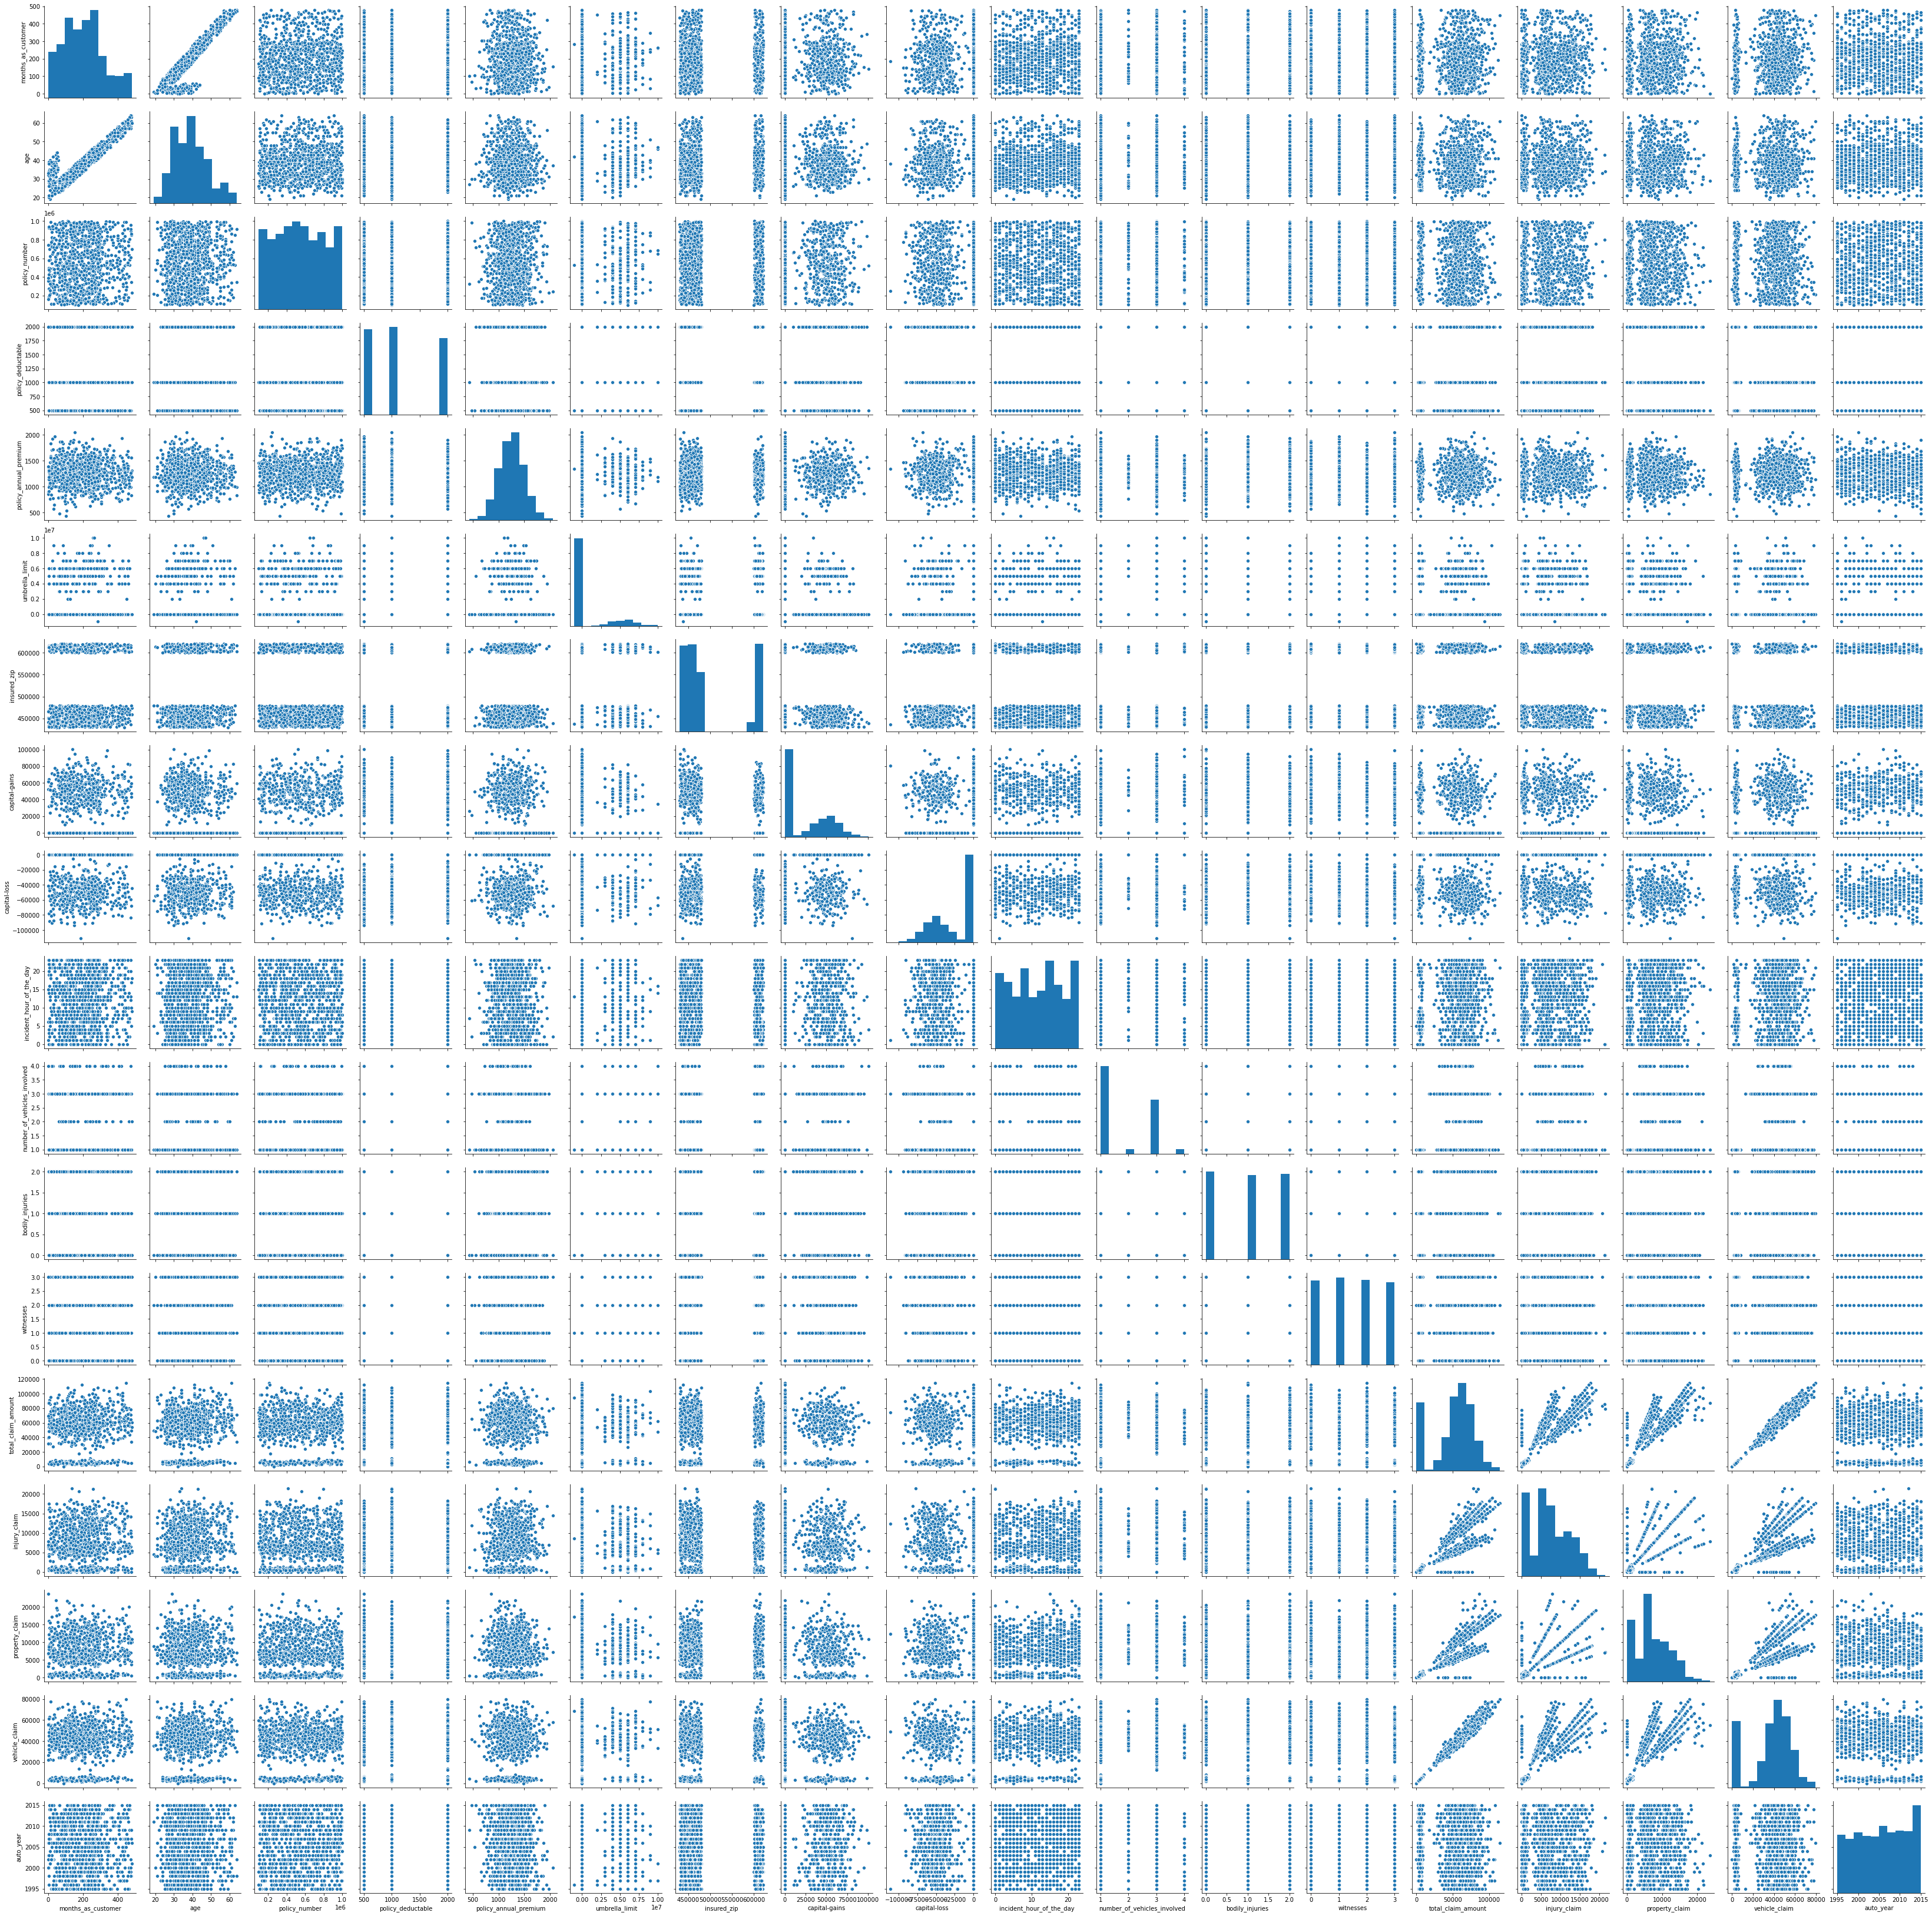

In [138]:
sns.pairplot(df)

## Label Encoding

Lets drop policy_number first as it does not have any impact on the target variable. It is just a unique identifier for each policy.

In [154]:
df.drop(['policy_number'],axis=1,inplace=True)

In [155]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_col.columns:
    df[i]=le.fit_transform(df[i])

In [157]:
df['fraud_reported']=le.fit_transform(df['fraud_reported'])

In [158]:
df.head()

months_as_customer  age  policy_bind_date  policy_state  policy_csl  \
0                 328   48               532             2           1   
1                 228   42               821             1           1   
2                 134   29               186             2           0   
3                 256   41               766             0           1   
4                 228   44               181             0           2   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

   insured_sex  insured_education_level  insured_occupation  insured_hobbies  \
0            1                        4                   2               17   
1            1                        4                   6               15   
2            0                        6                  11                2   
3            0                        6                   1                2   
4            1                        0                  11                2   

   insured_relationship  capital-gains  capital-loss  incident_date  \
0                     0          53300             0             49   
1                     2              0             0             41   
2                     3          35100             0             44   
3                     4          48900        -62400             19   
4                     4          66000        -46000             34   

   incident_type  collision_type  incident_severity  authorities_contacted  \
0              2               2                  0                      4   
1              3               1                  1                      4   
2              0               1                  1                      4   
3              2               0                  0                      4   
4              3               1                  1                      2   

   incident_state  incident_city  incident_location  incident_hour_of_the_day  \
0               4              1                996                         5   
1               5              5                628                         8   
2               1              1                685                         7   
3               2              0                669                         5   
4               1              0                220                        20   

   number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  \
0                            1                2                1          2   
1                            1                0                0          0   
2                            3                1                2          3   
3                            1                0                1          2   
4                            1                1                0          1   

   police_report_available  total_claim_amount  injury_claim  property_claim  \
0                        1               71610          6510           13020   
1                        0                5070           780             780   
2                        0               34650          7700            3850   
3                        0               63400          6340            6340   
4                        0                6500          1300             650   

   vehicle_claim  auto_make  auto_model  auto_year  fraud_reported  
0          52080         10           1       2004               1  
1           3510          8          12       2007               1  
2          23100          4          30       2007               0  
3    

## Checking Correlation

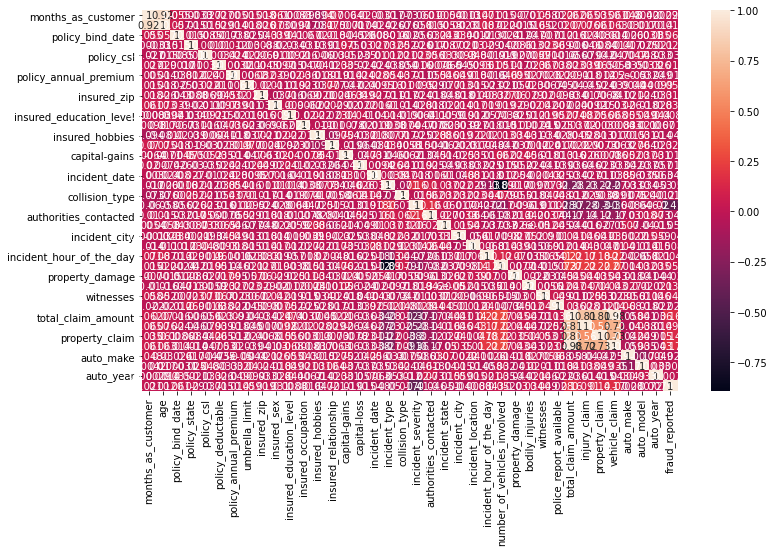

In [166]:
corr_mat=df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_mat,annot=True)
plt.show()

In [167]:
corr_matrix=df.corr()
corr_matrix['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
policy_bind_date               0.060642
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
incident_location             -0.008832
policy_annual_premium         -0.014480
capital-loss                  -0.014863


POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation. We can see some variables have positive correlation with the target variable.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation. We can see some variables have negative correlation with the target variable

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. So we can carry on with all features.

incident_severity is most closely related to the target variable.

## PCA - Principal Component Analysis

PCA is a dimensionality reduction technique which is used when we have large no. of features in our dataset and there are some correlated features amoung them.

The issue with high dimension dataset is overfitting. So we use PCA to avoid this issue.

In [169]:
x=df.drop('fraud_reported', axis=1)
y=df['fraud_reported']

from sklearn.decomposition import PCA
pca=PCA(n_components=30)
prin_comp=pd.DataFrame(pca.fit_transform(x))

In [170]:
prin_comp

0              1             2             3             4  \
0   -1.101058e+06  -34164.279747  20717.677174  -4878.733100  39484.145247   
1    3.899018e+06  -33666.352091 -62188.755106 -29077.892377    -56.086999   
2    3.898954e+06  -71821.284310 -25176.111218 -10962.763161  28124.576235   
3    4.899051e+06  102740.881718  26088.102170  41858.475846  -3712.805994   
4    4.899080e+06  107274.890562 -47486.768438  50164.180673  17452.141399   
..            ...            ...           ...           ...           ...   
995 -1.101060e+06  -69529.401833  35107.550507 -42652.678843    672.514204   
996 -1.101006e+06  106996.674079  67756.376164   3132.925325  51713.828689   
997  1.898938e+06  -59332.804140  17221.072921 -16450.446934  28068.578344   
998  3.898971e+06  -61219.019744  -9656.611188 -36126.984302   2175.791006   
999 -1.100891e+06  113432.725530 -61600.620794 -27664.938041  -5760.007785   

               5            6           7           8           9          10  \
0    1019.674049  4635.963471 -167.724632  516.458958   78.482090 -123.005233   
1    -901.368950  -181.072852  890.540318  121.262744  377.439595    9.824880   
2   -2727.652468 -2673.823529  845.109017  199.053781 -293.952873 -122.879929   
3    6206.866818  -366.390327  894.099343  149.478673  310.096446 -167.764549   
4    -441.253414  -435.205673 -178.722436 -263.628160 -320.620108 -313.556515   
..           ...          ...         ...         ...         ...         ...   
995 -2071.909156 -6117.081373 -100.437591   48.062077  -21.325384  -51.040368   
996 -5639.109717   410.182955 -263.442273 -257.933329 -372.476265 -152.376128   
997  4440.004278  -318.220432 -576.906903  249.267142   37.266521 -101.809597   
998  2787.610484  -384.165761  931.165227   83.749645  108.426135 -101.455862   
999  -250.493640   196.701937  -87.743973 -454.921448  -42.431241  483.249940   

             11         12         13         14         15        16  \
0    125.796805  17.281408  16.847507   8.352098   1.118759 -8.672143   
1     19.204559  11.735351   5.725220   0.899412  -0.241771 -6.230956   
2    -68.858085  14.117567 -11.943902   3.247027  -3.486811  7.548382   
3     30.550507 -11.567933 -13.465542   6.602050 -10.525821  4.772702   
4     34.307150   2.563023 -10.213393 -11.739829  -3.593067  8.383748   
..          ...        ...        ...        ...        ...       ...   
995 -215.309581  17.040801  11.984407  -7.669344  -0.466133 -2.084105   
996   67.594093  17.691803  -6.819069 -10.238889  -8.129115 -7.896636   
997  -77.903623  15.122043  -0.536773   8.861545   5.955130  7.307253   
998  244.944435  24.606047  11.668849  12.223124   3.907890  7.728530   
999  264.286161  24.680088   5.759190   3.824713  -1.726479 -3.505937   

           17        18         19        20        21        22        23  \
0    2.552550  3.615845   0.990560  0.152341 -1.676739  0.529793 -1.591428   
1   -0.256193  0.859385   1.572199 -1.754049  1.755376  1.620496  0.192822   
2   -2.072295 -3.000304  -5.182509  2.065146 -1.977989  2.600864  0.166979   
3    5.690615  1.588916  -1.173538  1.260939 -3.422010  1.963852  1.181507   
4    0.650461 -8.211553   1.456446  1.552123 -2.323641 -2.609366  0.690243   
..        ...       ...        ...       ...       ...       ...       ...   
995  4.222353 -0.066555  13.770392  3.491356  1.238361  1.893554  1.866895   
996 -6.281216  4.654273  -4.046132 -0.356118 -0.952407  2.089263  3.618132   
997  2.193613  6.915336   2.355582  3.592609 -2.343199  1.072327 -0.938456   
998  5.549461 -5.200027   4.404762  2.180331 -1.461000 -3.020009  1.847131   
999 -4.242477 -3.210969   2.532305 -3.125217 -1.475677 -2.729859 -2.077199   

           24        25        26        27        28        29  
0   -2.194963 -0.898431 -0.544589 -1.337149  0.398368 -0.743886  
1   -1.216311 -0.571048  1.487995 -0.887859 -0.546774 -0.540288  
2   -0.889683  2.369160 -1.469788 -0.901108  1.149931  0.488050  
3   -1.896454 -0.791277 -0.3

## ML Model Development

In [172]:
#Finding best random_state
x=prin_comp
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
maxAccu=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)
    

Best accuracy is  0.5833333333333334 on random state  6


**Building the model**

Let's try different algorithms and find out the accuracy for each model. We will also consider the cross validation score to check if the accuracy is due to overfitting.

The model with high accuracy and low difference between accuracy score and cross validation score will be considered as the best fit model.

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=6)

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

model_classify = [RandomForestClassifier(n_estimators=100),KNeighborsClassifier(n_neighbors = 5),GaussianNB() ,LinearSVC(), DecisionTreeClassifier(),AdaBoostClassifier(),LogisticRegression()]
df_result=pd.DataFrame(columns=['Model','Accuracy','Cross Validation Score','Difference'])


for model in model_classify:
    m = model
    test_string=str(m)
    spl_word='('
    print('Model: ',m)
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    acc_final=acc*100
    print('Score: ', acc_final)
    scr=cross_val_score(m,x,y,cv=5)
    scr_final=(scr.mean())*100
    print('Cross validation score: ',scr_final)
    diff=((acc*100)-scr_final)
    print('Difference between cross validation score and accuracy is ', diff)
    print('Confusion matrix: ', confusion_matrix(y_test,pred))
    print('Classification report: ', classification_report(y_test,pred))
    print('------------------------------------------------')
    df_result=df_result.append({'Model':test_string,'Accuracy':acc_final,'Cross Validation Score':scr_final,'Difference':diff}, ignore_index=True)
    

Model:  RandomForestClassifier()
Score:  78.66666666666666
Cross validation score:  77.70000000000002
Difference between cross validation score and accuracy is  0.9666666666666401
Confusion matrix:  [[220   8]
 [ 56  16]]
Classification report:                precision    recall  f1-score   support

           0       0.80      0.96      0.87       228
           1       0.67      0.22      0.33        72

    accuracy                           0.79       300
   macro avg       0.73      0.59      0.60       300
weighted avg       0.77      0.79      0.74       300

------------------------------------------------
Model:  KNeighborsClassifier()
Score:  72.33333333333334
Cross validation score:  70.5
Difference between cross validation score and accuracy is  1.8333333333333428
Confusion matrix:  [[208  20]
 [ 63   9]]
Classification report:                precision    recall  f1-score   support

           0       0.77      0.91      0.83       228
           1       0.31      0.12     

In [174]:
df_result

Model   Accuracy  Cross Validation Score  Difference
0  RandomForestClassifier()  78.666667                    77.7    0.966667
1    KNeighborsClassifier()  72.333333                    70.5    1.833333
2              GaussianNB()  74.000000                    72.8    1.200000
3               LinearSVC()  66.666667                    41.4   25.266667
4  DecisionTreeClassifier()  70.333333                    71.3   -0.966667
5      AdaBoostClassifier()  78.666667                    74.4    4.266667
6      LogisticRegression()  59.000000                    53.4    5.600000

Random Forest Classifier is the best fit model.

In [175]:
randomforest=RandomForestClassifier(n_estimators=100,oob_score=True)
randomforest.fit(x_train,y_train)
pred = randomforest.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy is ',acc*100)

Accuracy is  77.33333333333333


**Feature Importance**

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

Feature importance scores play an important role in a predictive modeling project, including providing insight into the data, insight into the model, and the basis for dimensionality reduction and feature selection that can improve the efficiency and effectiveness of a predictive model on the problem.

Sklearn measures a feature importance by looking at how much the tree nodes uses that feature, reduced impurity on average (across all trees in the forest). It computes this score automatically for each feature after training and scales the results so that the sum of all importances is equal to 1.

In [176]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(randomforest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

importance
feature            
27            0.137
2             0.045
28            0.045
6             0.044
16            0.034
25            0.033
12            0.032
9             0.032
29            0.031
23            0.030
24            0.030
10            0.030
20            0.030
21            0.030
11            0.029

Now lets plot a graph for these values.

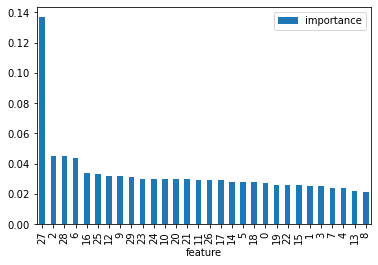

In [177]:
importances.plot.bar()

Out of bag (OOB) score is a way of validating the Random forest model.

The RandomForestClassifier is trained using bootstrap aggregation, where each new tree is fit from a bootstrap sample of the training observations . The out-of-bag (OOB) error is the average error for each  calculated using predictions from the trees that do not contain  in their respective bootstrap sample. This allows the RandomForestClassifier to be fit and validated whilst being trained 1.

In [178]:
print("oob score:", round(randomforest.oob_score_, 4)*100, "%")

oob score: 76.0 %


We will use out-of-bag samples to estimate the generalization accuracy

## Hyper Parameter Tuning

In [ ]:
param_grid = { "criterion" : ["gini", "entropy"], 
              "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
              "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(x_train, y_train)
clf.best_params_

Testing the model with our best fit parameters

In [ ]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 5, 
                                       min_samples_split = 12,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(x_train, y_train)
pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

Now that we have a proper model, we can start evaluating it’s performace in a more accurate way. Previously we only used accuracy and the oob score, which is just another form of accuracy.

**Confusion Matrix**

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

In [ ]:
predictions = cross_val_predict(random_forest, x_train, y_train, cv=3)
confusion_matrix(y_test, pred)

In [ ]:
import sklearn
sklearn.metrics.plot_confusion_matrix(clf,x_test,y_test)

From the above plotting, we can see that 157 is True Positive Value and 73 is the True Negative Value.
13 and 25 are error terms and represent False Positive and False Negative respectively. This indicates that 13 people are predicted are Not Survived wrongly and 25 people are predicted as Survived wrongly.

**Precision and Recall**

Precision is a useful metric in cases where False Positive is a higher concern than False Negatives.

Recall is a useful metric in cases where False Negative trumps False Positive.

In [ ]:
# Precision and Recall:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

This indicates that the model predicts 78% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 66 % of the people who actually survived


**F1 score**

F1-score is a harmonic mean of Precision and Recall, and so it gives a combined idea about these two metrics. It is maximum when Precision is equal to Recall.

But there is a catch here. The interpretability of the F1-score is poor. This means that we don’t know what our classifier is maximizing – precision or recall? So, we use it in combination with other evaluation metrics which gives us a complete picture of the result.

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

There we have it, a 72 % F-score. The score is not that high, because we have a recall of 66%. But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This is a problem, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the precision/recall tradeoff.

**Precision Recall Curve**

For each person the Random Forest algorithm has to classify, it computes a probability based on a function and it classifies the person as survived (when the score is bigger the than threshold) or as not survived (when the score is smaller than the threshold). That’s why the threshold plays an important part. We will plot the precision and recall with the threshold using matplotlib:

Getting the probabilities of our predictions.

In [ ]:
y_scores = random_forest.predict_proba(x_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [ ]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

**Roc_Auc Curve**

This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The red line in the middel represents a purely random classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible. Our Random Forest model seems to do a good job.

**ROC_AUC Score**

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.
A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

In [ ]:
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

## Saving the model

In [ ]:
import joblib
joblib.dump(random_forest,'Automobile Insurance Fraud Detection.obj')